In [48]:
# Importing requird python packages
# Path to hsmpy package
HSMPY_PATH = r'\\CHCFPP01\Guest\MRajabi\Python Scripts'
import sys, os, arcpy, csv, json, math
sys.path.append(HSMPY_PATH)
import hsmpy3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML 
import subprocess 
import webbrowser
import time
import copy
import scipy
from matplotlib.gridspec import GridSpec
from __future__ import print_function
from mailmerge import MailMerge
import shutil
import openpyxl
from scipy.optimize import curve_fit
from time import gmtime, strftime
from ipywidgets import FloatProgress
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-11-16 14:09:54


In [49]:
DB_Dir = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\7_BaseData\Master_BaseFiles_Data\9.0_IL_SafetyDB'
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-11-16 14:09:56


In [50]:
#Read Crash Data
print(strftime("%Y-%m-%d %H:%M:%S"))
Crash_DF = pd.DataFrame()
Veh_DF = pd.DataFrame()
Occ_DF = pd.DataFrame()
for year in range(2005,2017):
    df = pd.read_csv(DB_Dir+'\\{}_Crash_Assigned.csv'.format(year),index_col=0)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = year
    Crash_DF = pd.concat([Crash_DF,df])
    df = pd.read_csv(DB_Dir+'\\{}_Vehicle_Cleaned_EA.csv'.format(year),index_col=[0,1])
    df['YEAR'] = year
    Veh_DF = pd.concat([Veh_DF,df])
    df = pd.read_csv(DB_Dir+'\\{}_Person_Cleaned_EA.csv'.format(year),index_col=[0,1,2], encoding='latin-1',low_memory=False)
    df['DOB'] = pd.to_datetime(df['DOB'])
    df['YEAR'] = year
    Occ_DF = pd.concat([Occ_DF,df])
    print(year)
print(Crash_DF.shape,Veh_DF.shape,Occ_DF.shape)
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-11-16 14:10:06
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
(4020749, 56) (6943650, 40) (9451580, 35)
2018-11-16 14:19:07


In [ ]:
print(strftime("%Y-%m-%d %H:%M:%S"))
K_Crash_DF = Crash_DF[Crash_DF.KABCO=='K']
idx = list(K_Crash_DF.index)
K_Occ_DF = Occ_DF.loc[idx]
K_Veh_DF = Veh_DF.loc[idx]
print(K_Crash_DF.shape,K_Veh_DF.shape,K_Occ_DF.shape)
K_Crash_DF.to_csv('K_Crash_05_16.csv')
K_Veh_DF.to_csv  ('K_Veh_05_16.csv')
K_Occ_DF.to_csv  ('K_Occ_05_16.csv')

A_Crash_DF = Crash_DF[Crash_DF.KABCO=='A']
idx = list(A_Crash_DF.index)
A_Occ_DF = Occ_DF.loc[idx]
A_Veh_DF = Veh_DF.loc[idx]
print(A_Crash_DF.shape,A_Veh_DF.shape,A_Occ_DF.shape)
A_Crash_DF.to_csv('A_Crash_05_16.csv')
A_Veh_DF.to_csv  ('A_Veh_05_16.csv')
A_Occ_DF.to_csv  ('A_Occ_05_16.csv')

B_Crash_DF = Crash_DF[Crash_DF.KABCO=='B']
idx = list(B_Crash_DF.index)
B_Occ_DF = Occ_DF.loc[idx]
B_Veh_DF = Veh_DF.loc[idx]
print(B_Crash_DF.shape,B_Veh_DF.shape,B_Occ_DF.shape)
B_Crash_DF.to_csv('B_Crash_05_16.csv')
B_Veh_DF.to_csv  ('B_Veh_05_16.csv')
B_Occ_DF.to_csv  ('B_Occ_05_16.csv')

C_Crash_DF = Crash_DF[Crash_DF.KABCO=='C']
idx = list(C_Crash_DF.index)
C_Occ_DF = Occ_DF.loc[idx]
C_Veh_DF = Veh_DF.loc[idx]
print(C_Crash_DF.shape,C_Veh_DF.shape,C_Occ_DF.shape)
C_Crash_DF.to_csv('C_Crash_05_16.csv')
C_Veh_DF.to_csv  ('C_Veh_05_16.csv')
C_Occ_DF.to_csv  ('C_Occ_05_16.csv')

O_Crash_DF = Crash_DF[Crash_DF.KABCO=='O']
idx = list(O_Crash_DF.index)
O_Occ_DF = Occ_DF.loc[idx]
O_Veh_DF = Veh_DF.loc[idx]
print(O_Crash_DF.shape,O_Veh_DF.shape,O_Occ_DF.shape)
O_Crash_DF.to_csv('O_Crash_05_16.csv')
O_Veh_DF.to_csv  ('O_Veh_05_16.csv')
O_Occ_DF.to_csv  ('O_Occ_05_16.csv')

print(strftime("%Y-%m-%d %H:%M:%S"))

In [7]:
print(strftime("%Y-%m-%d %H:%M:%S"))
K_Crash_DF = pd.read_csv('K_Crash_05_16.csv',index_col=0)
K_Veh_DF = pd.read_csv('K_Veh_05_16.csv',index_col=[0,1])
K_Occ_DF = pd.read_csv('K_Occ_05_16.csv',index_col=[0,1,2], encoding='latin-1',low_memory=False)
print(K_Crash_DF.shape,K_Veh_DF.shape,K_Occ_DF.shape)
A_Crash_DF = pd.read_csv('A_Crash_05_16.csv',index_col=0)
A_Veh_DF = pd.read_csv('A_Veh_05_16.csv',index_col=[0,1],low_memory=False)
A_Occ_DF = pd.read_csv('A_Occ_05_16.csv',index_col=[0,1,2], encoding='latin-1',low_memory=False)
K_Crash_DF['DATE'] = pd.to_datetime(K_Crash_DF['DATE'])
A_Crash_DF['DATE'] = pd.to_datetime(A_Crash_DF['DATE'])
K_Occ_DF['DOB'] = pd.to_datetime(K_Occ_DF['DOB'])
A_Occ_DF['DOB'] = pd.to_datetime(A_Occ_DF['DOB'])
print(A_Crash_DF.shape,A_Veh_DF.shape,A_Occ_DF.shape)
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-11-16 11:28:49
(11510, 56) (17049, 40) (29143, 35)
(126492, 56) (205139, 40) (334237, 35)
2018-11-16 11:29:03


In [13]:
display(K_Crash_DF.groupby(['YEAR'])['K','A','B','C','O'].aggregate(sum))
df1 = pd.DataFrame(K_Occ_DF.groupby(['YEAR','INJ_SEV']).size())
df1 = df1.unstack()
display(df1)


,K,A,B,C,O
YEAR,,,,,
2005,1363,559,404,112,756
2006,1254,495,417,99,677
2007,1248,439,395,85,675
2008,1043,332,320,83,621
2009,911,355,332,74,534
2010,927,313,297,71,531
2011,918,295,271,55,563
2012,956,348,315,74,591
2013,991,334,292,68,526


0                     
INJ_SEV    0    1    2    3     4
YEAR                             
2005     756  112  404  559  1363
2006     677   99  417  495  1254
2007     675   85  395  439  1248
2008     621   83  320  332  1043
2009     534   74  332  355   911
2010     531   71  297  313   927
2011     563   55  271  295   918
2012     591   74  315  348   956
2013     526   68  292  334   991
2014     538   76  257  314   924
2015     604   88  279  286   998
2016     643   55  341  343  1078

In [19]:
df = K_Occ_DF
df['UID'] = list(df.index.droplevel([0,2]))
def Ex_Unit(u):
    if u==1:
        return('Unit1')
    else:
        return('OtherUnits')
def Ex_PT(u):
    if u==1:
        return('Driver')
    elif u in [2,3]:
        return('Front Passenger')
    elif u==0:
        return('Unknown')
    else:
        return('BackSeat Passengers')
df['Unit'] = [Ex_Unit(u) for u in df.UID]
df['PersonType'] = [Ex_PT(p) for p in df.SEAT_POS]
def Ex_SE(s):
    if s in [1,3,5,7,8]:
        return('Improper/Not Used')
    elif s in [9]:
        return('Unknown')
    else:
        return('Used')
df['SafetyEq'] = [Ex_SE(s) for s in df.SAF_EQI]
df['Ejection'] = [{1:'Not Ejected',2:'Ejected',3:'Ejected',4:'Trapped',9:'Not Ejected'}[e] for e in df.EJECT]

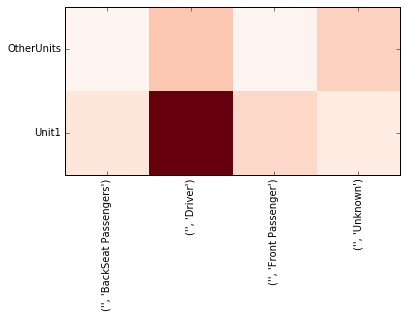

PersonType BackSeat Passengers Driver Front Passenger Unknown
Unit                                                         
OtherUnits                 283   1561             311    1356
Unit1                      816   6427            1218     639

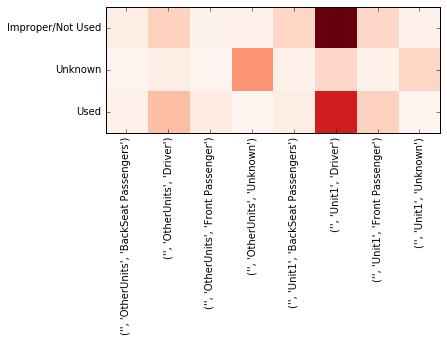

\
Unit                       OtherUnits                                  
PersonType        BackSeat Passengers Driver Front Passenger Unknown   
SafetyEq                                                               
Improper/Not Used                 161    581              67      83   
Unknown                            25    152              26    1260   
Used                               97    828             218      13   

                                                                      
Unit                            Unit1                                 
PersonType        BackSeat Passengers Driver Front Passenger Unknown  
SafetyEq                                                              
Improper/Not Used                 551   3418             525      85  
Unknown                            94    519              98     547  
Used                              171   2490             595       7

In [46]:
df = df[(df.INJ_SEV==4)]
display(PairTable(df,['Unit'],['PersonType'],False))
display(PairTable(df,['SafetyEq'],['Unit','PersonType'],False))



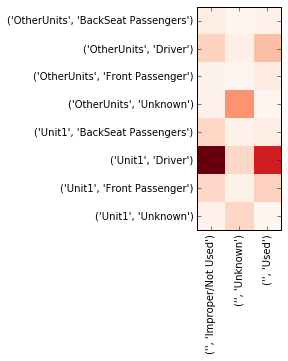

SafetyEq                       Improper/Not Used Unknown  Used
Unit       PersonType                                         
OtherUnits BackSeat Passengers               161      25    97
           Driver                            581     152   828
           Front Passenger                    67      26   218
           Unknown                            83    1260    13
Unit1      BackSeat Passengers               551      94   171
           Driver                           3418     519  2490
           Front Passenger                   525      98   595
           Unknown                            85     547     7

In [40]:
def PairTable(DF,Rows,Cols,Percentage=False):
    All = Rows + Cols
    df = pd.DataFrame(DF.groupby(All).size())
    df = df.rename(columns={0:''})
    #df1.Fatalities = df1.Fatalities/df1.Fatalities.sum()
    df = df.unstack(level=[All.index(c) for c in Cols])
    if Percentage:
        for i,r in df.iterrows():
            df.loc[i] = df.loc[i]/sum(df.loc[i])
    plt.imshow(df,cmap=plt.cm.Reds,interpolation='nearest',aspect='equal')
    plt.xticks(range(0,df.shape[1]),df.columns,rotation=90)
    plt.yticks(range(0,df.shape[0]),df.index,rotation=0)
    plt.show()
    return(df)
PairTable(df,['Unit','PersonType'],['SafetyEq'],False)
